# Predicting Client Subscription to Bank Term Deposits Using Machine Learning

### Project Description
This project aims to build a predictive model to determine the likelihood of clients subscribing to a bank's term deposit product based on historical marketing campaign data. The analysis involves data preprocessing, exploratory data analysis (EDA), feature engineering, and applying machine learning algorithms to create a robust classification model. Key insights from the data are extracted to assist the bank's marketing team in refining their strategies and targeting the right customers effectively.

The deliverables include a comprehensive report summarizing findings, code for reproducibility, and a running instance of the model deployed for real-time predictions.

Key focus areas:

* Data preprocessing and exploratory data analysis (EDA)
* Building a predictive model
* Evaluating performance
* Extracting insights for business decisions



# Data Understanding & Preparation

In [1]:
# Import your libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load the datasets
# data1 = pd.read_csv('data\bank-additional-full.csv')
data1 = pd.read_csv(r'C:\Users\viole\Downloads\marketing analytics project\data\bank-additional-full.csv', sep=";")
data2 = pd.read_csv(r'C:\Users\viole\Downloads\marketing analytics project\data\bank-additional.csv', sep=";")
data3 = pd.read_csv(r'C:\Users\viole\Downloads\marketing analytics project\data\bank-full.csv', sep=";")
data4 = pd.read_csv(r'C:\Users\viole\Downloads\marketing analytics project\data\bank.csv', sep=";")
# data = pd.read_csv('data\Customer Call List.csv')
# data1.head()


In [14]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [16]:
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
data4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


* bank-additional-full.csv: The most comprehensive dataset with 41,188 examples and 20 features, ordered by date.
* bank-additional.csv: A 10% subset (4,119 examples) randomly selected from bank-additional-full.csv for faster experimentation.
* bank-full.csv: An older version of the dataset with all examples (41,188) but only 17 features.
* bank.csv: A 10% subset (4,119 examples) of bank-full.csv, also with 17 features.

#### Choosing a Primary Dataset
I will use bank-additional-full.csv as the primary dataset for my analysis and model building because:
* It is the most comprehensive.
* It includes all 41,188 examples and 20 features, ensuring maximum data availability and feature richness.

In [20]:
# Step 1: Inspect the Dataset

data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
data1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
# Exploring the target variable (y):
# Check the distribution of the target variable

print(data1['y'].value_counts())


no     36548
yes     4640
Name: y, dtype: int64


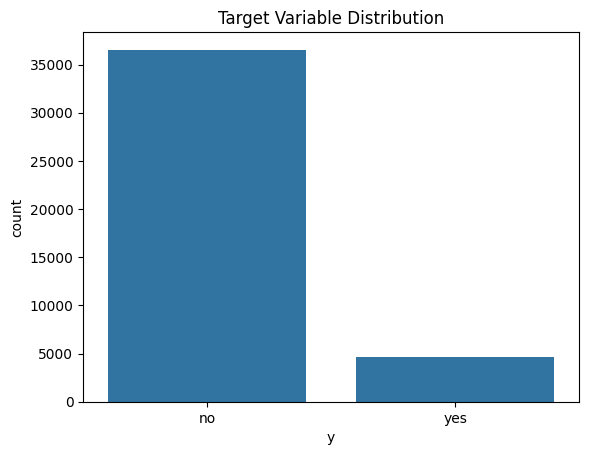

In [27]:
# Visualizing the class balance:

sns.countplot(data=data1, x='y')
plt.title('Target Variable Distribution')
plt.show()


### Reviewing feature distributions:

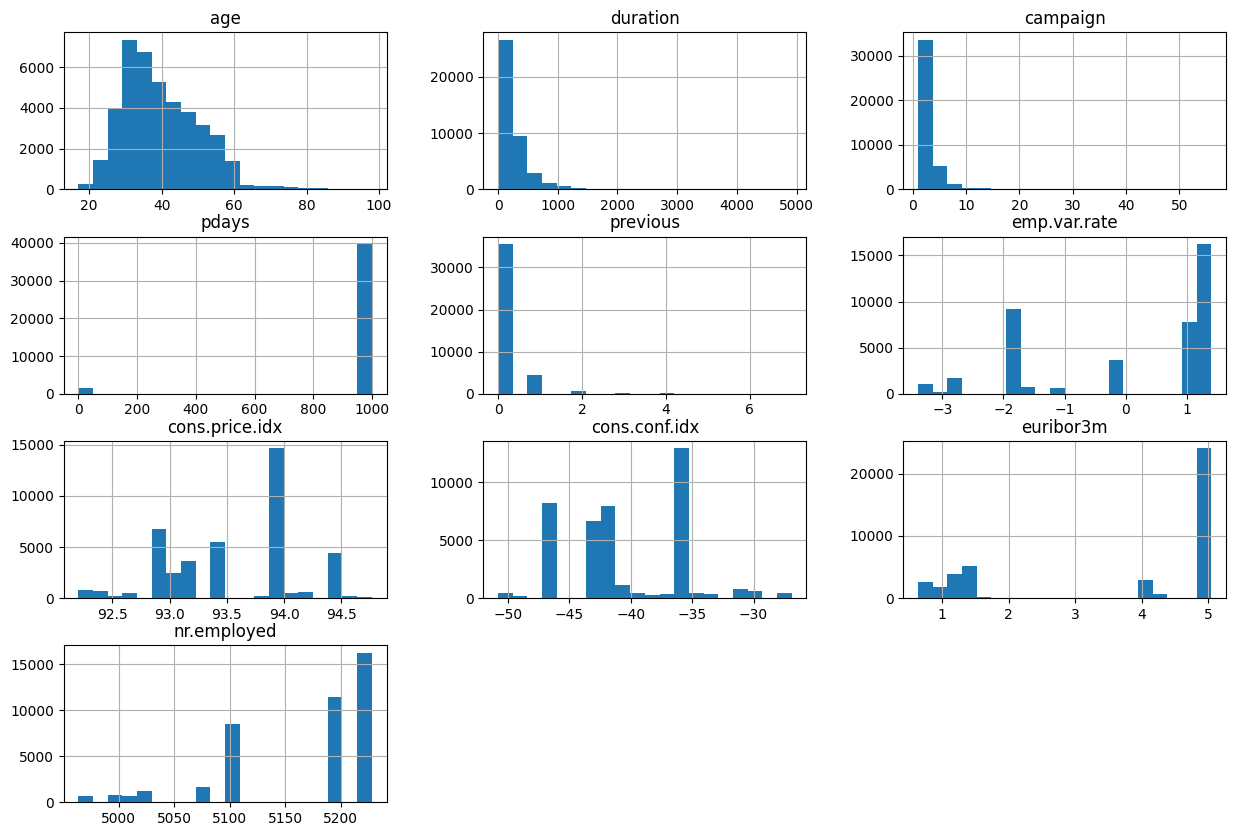

In [28]:
# For numerical features:
data1.hist(bins=20, figsize=(15, 10))
plt.show()

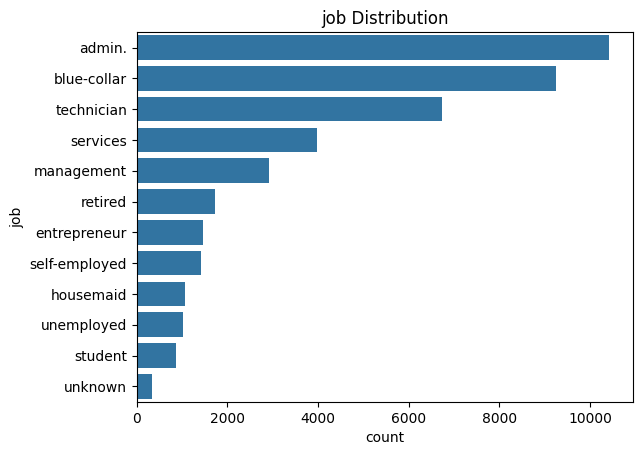

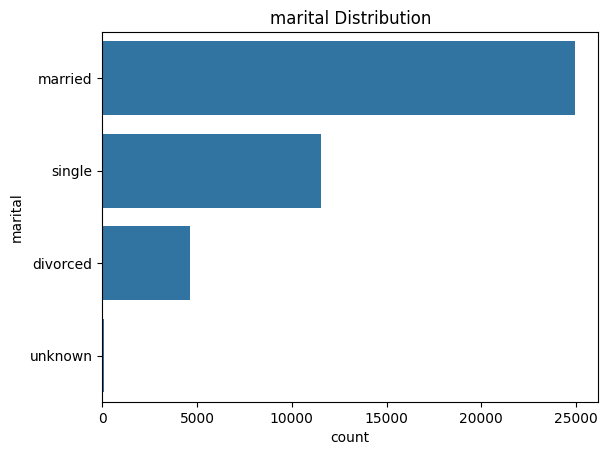

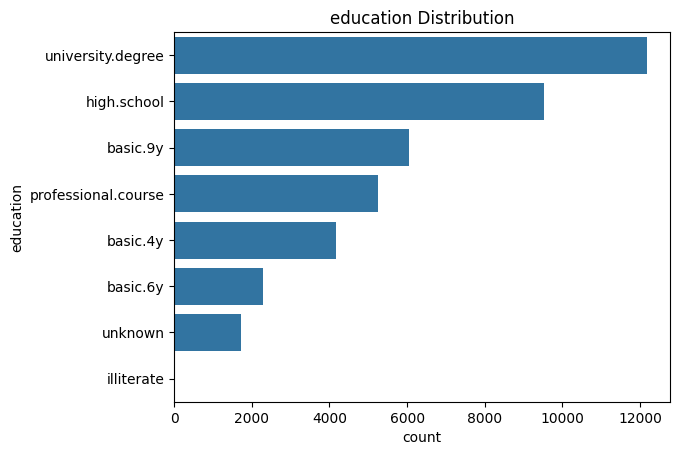

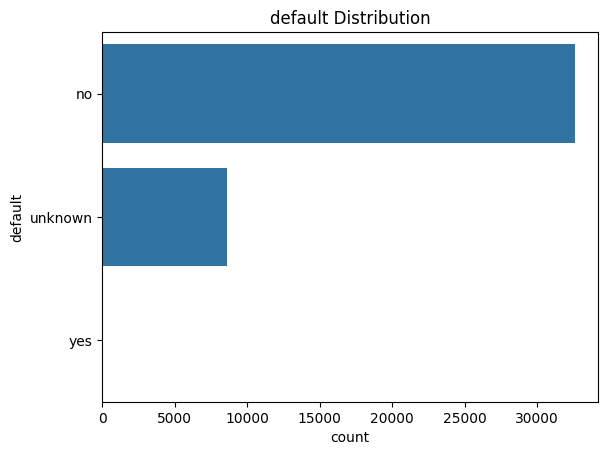

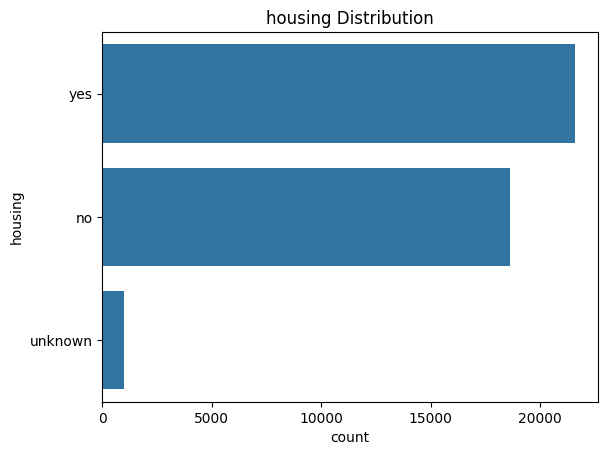

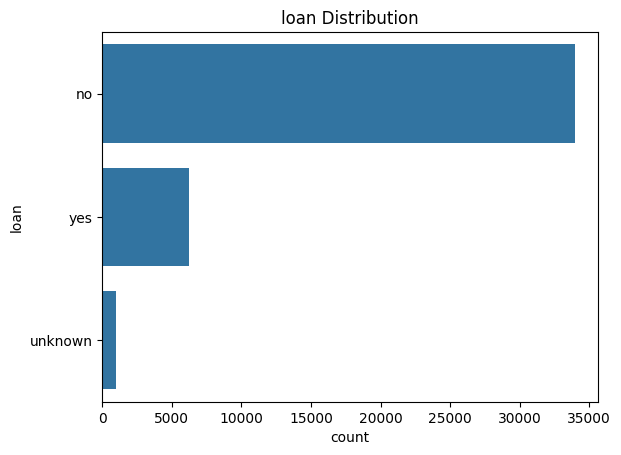

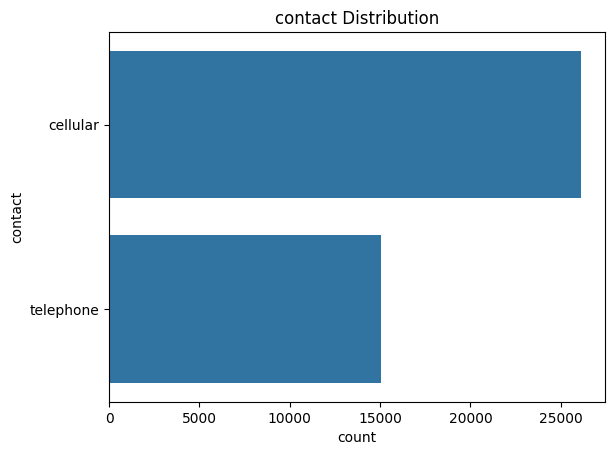

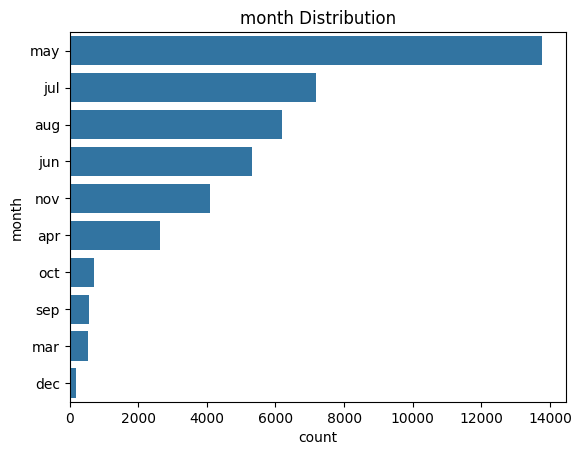

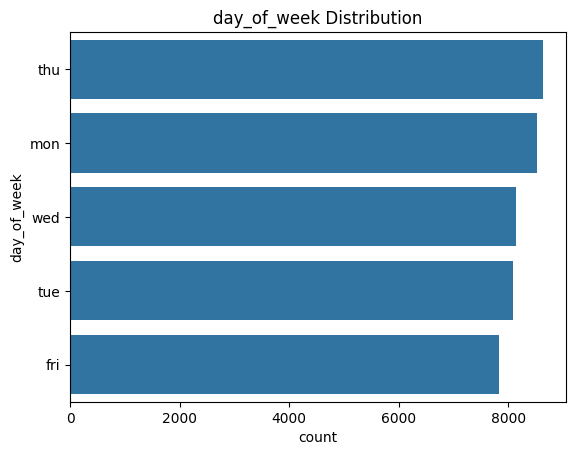

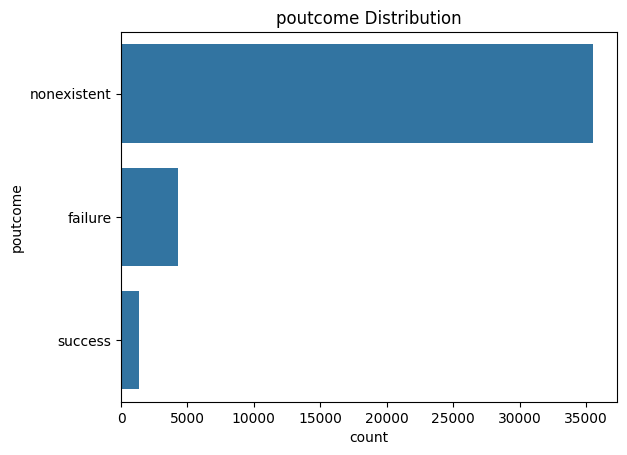

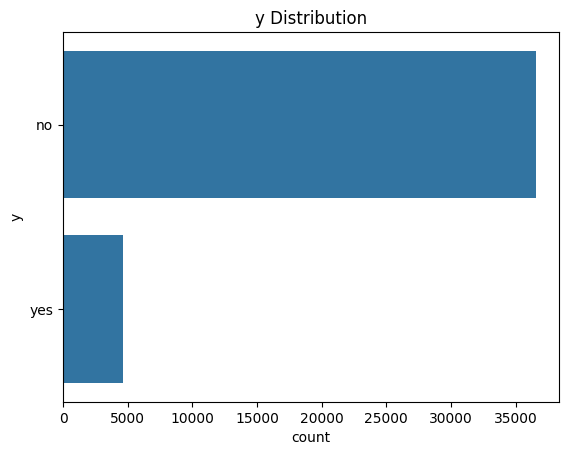

In [29]:
# For categorical distributions

categorical_cols = data1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(data=data1, y=col, order=data1[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.show()


### Data Preprocessing
Handle categorical variables:

Converting categorical variables into numerical form using one-hot encoding or label encoding.

In [30]:
# One-hot encoding for categorical variables
data1 = pd.get_dummies(data1, drop_first=True)

### Normalize numerical features:

Scale numerical features to ensure they are on the same scale.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns
data1[numerical_cols] = scaler.fit_transform(data1[numerical_cols])


In [35]:
data1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [36]:
# Updating the Target Variable
# Use y_yes as the target:

X = data1.drop(columns=['y_yes'])
y = data1['y_yes']  # Using this directly, as it's already binary

In [37]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the results
print(X_resampled.shape)
print(y_resampled.value_counts())


(73096, 53)
0    36548
1    36548
Name: y_yes, dtype: int64


In [38]:
data1['y_yes'].value_counts()

0    36548
1     4640
Name: y_yes, dtype: int64

###  Split Data into Training and Testing Sets
Dividing the dataset into training and test sets to evaluate the model’s performance.

In [40]:
from sklearn.model_selection import train_test_split

X = data1.drop(columns=['y_yes'])  # Features
y = data1['y_yes'].map({'yes': 1, 'no': 0})  # Encode target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (32950, 53)
Testing set size: (8238, 53)


### Conduct EDA
Correlation Analysis:

Understand relationships between numerical features and the target variable.

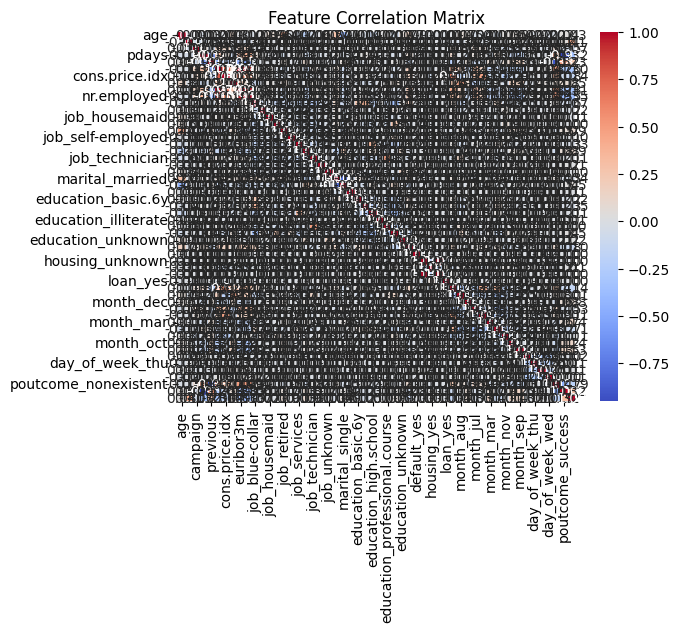

In [42]:
correlation_matrix = data1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [44]:
# Check X_train and y_train shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (32950, 53)
y_train shape: (32950,)


In [45]:
print(X_train.dtypes)

age                              float64
duration                         float64
campaign                         float64
pdays                            float64
previous                         float64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic.

In [46]:
print(X_train.isnull().sum().sum())  # Total missing values
print(np.isinf(X_train).sum().sum())  # Total infinite values

0
0


In [48]:
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12556,-0.002309,-0.633630,-0.204909,0.195414,-0.349494,0.839061,0.591424,-0.474791,0.771846,0.845170,...,0,0,0,0,1,0,0,0,1,0
35451,-0.865939,-0.548778,0.517118,0.195414,-0.349494,-1.197935,-1.179380,-1.231034,-1.370650,-0.940281,...,1,0,0,0,1,0,0,0,1,0
30592,1.820911,-0.946038,1.239145,0.195414,1.671136,-1.197935,-1.179380,-1.231034,-1.307228,-0.940281,...,1,0,0,0,1,0,0,0,0,0
17914,0.285568,-0.633630,0.878132,0.195414,-0.349494,0.839061,0.591424,-0.474791,0.772422,0.845170,...,0,0,0,0,0,0,1,0,1,0
3315,-0.098268,0.330593,-0.204909,0.195414,-0.349494,0.648092,0.722722,0.886447,0.714190,0.331680,...,1,0,0,0,0,1,0,0,1,0


In [65]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y_yes, dtype: uint8

In [66]:
# y_train.unique()
print(X_train.shape, y_train.shape)

(32950, 53) (41188,)


In [69]:
from sklearn.model_selection import train_test_split

X = data1.drop(columns=['y_yes'])  # Features
y = data1['y_yes'].map({'yes': 1, 'no': 0})  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)  # Verifying shapes match


(32950, 53) (32950,)


In [70]:
# Confirming alignment
X_train.index.equals(y_train.index)  

True


In [71]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
y_train = y_train.fillna(0)  # Handle any NaN in y_train

In [73]:
y_train.value_counts()

0.0    32950
Name: y_yes, dtype: int64

In [74]:
print(data1['y_yes'].value_counts())  # Check the original class distribution

0    36548
1     4640
Name: y_yes, dtype: int64


In [75]:
X_train.value_counts() # Ch

age        duration   campaign   pdays      previous   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_married  marital_single  marital_unknown  education_basic.6y  education_basic.9y  education_high.school  education_illiterate  education_professional.course  education_university.degree  education_unknown  default_unknown  default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_success
-1.249775   0.280454  -0.204909   0.195414  -0.349494   0.839061      0.591424       -0.474791       0.772999   0.845170    0                0                 0              0        

In [77]:
from sklearn.model_selection import train_test_split

X = data1  # Features
y = data1['y_yes']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())  # Check class distribution in y_train


0    29238
1     3712
Name: y_yes, dtype: int64


In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, y_train_resampled.shape)

(58476, 54) (58476,)


In [84]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

feature_importances.head()


,Feature,Importance
53,y_yes,0.580963
1,duration,0.158579
9,nr.employed,0.052554
8,euribor3m,0.038264
5,emp.var.rate,0.033874


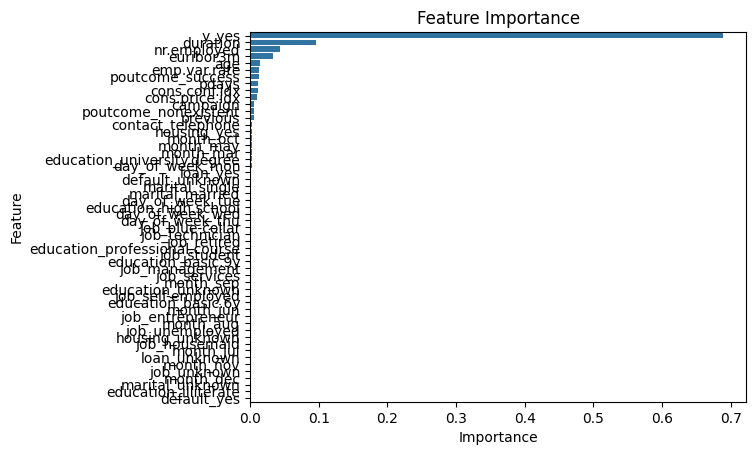

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


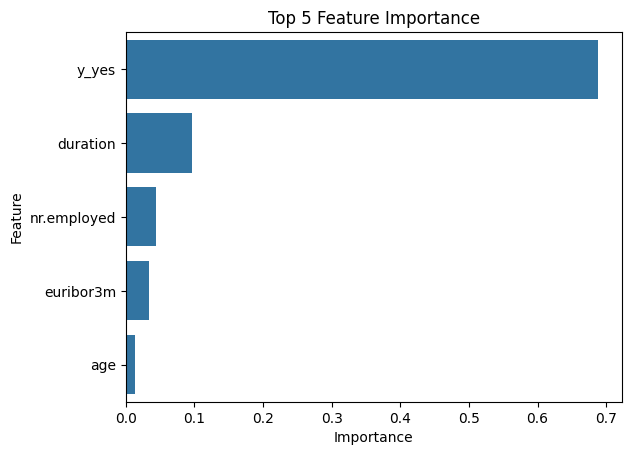

In [85]:
# Fit the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Sort the features by importance in descending order
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Select the top 5 features
top_5_features = feature_importances.head(5)

# Plot the top 5 features
sns.barplot(x='Importance', y='Feature', data=top_5_features)

# Set the title
plt.title('Top 5 Feature Importance')

# Show the plot
plt.show()


### Model Building
Choose and train a model:

Start with a baseline model (e.g., Logistic Regression) and experiment with more advanced models (e.g., Random Forest, XGBoost).

In [86]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7310
           1       1.00      1.00      1.00       928

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



### Insights and Recommendations
Summarize findings from the dataset:

* Key patterns and trends from the data.
* Important features influencing the prediction.
* Recommendations for the bank's marketing strategies.

### Deployment
Saved the trained model for deployment using a library called joblib:

In [98]:
import pickle

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
with open('bank_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [96]:
# from sklearn.ensemble import RandomForestClassifier
# import joblib

# # Train the model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Save the model with joblib
# joblib.dump(model, 'bank_model.pkl')


['bank_model.pkl']

In [97]:
# import joblib
# joblib.dump(model, 'bank_model.pkl')

#### Building a simple interface using Streamlit  to demonstrate predictions.